In [13]:
from __future__ import print_function
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, adjusted_mutual_info_score, accuracy_score, homogeneity_score, silhouette_score, roc_auc_score, classification_report, confusion_matrix, f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, validation_curve
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
import timeit

from util import evaluate_data, graph_LC, graph_C, normalize_data, create_stratified_data, prepare_data, preprocess_ufc_data

2 :  0.19399642780783036 0.05916368299713843
3 :  0.282507399349742 0.057098973485999446
4 :  0.34210463760129667 0.05570873923015544
5 :  0.3948395707592829 0.054478583056702834
6 :  0.4428121205318017 0.0533595197579568
7 :  0.48723477089237777 0.052323265527417125
8 :  0.5229861838376224 0.05148928663125565
9 :  0.5566721829466614 0.05070348797216264
10 :  0.5838626814729916 0.05006921088829467
11 :  0.6106437574289557 0.04944448446984575
12 :  0.6337202200441064 0.04890617615602973
13 :  0.656344814087553 0.04837840865225712
14 :  0.6758538577588539 0.047923318087554775
15 :  0.694607865329636 0.04748584037006041
16 :  0.7113030855901934 0.04709638831160899
17 :  0.7270737163642942 0.046728504299167334
18 :  0.7403788738140717 0.046418132775104336
19 :  0.7530790412244366 0.046121873949916556
20 :  0.7648240578885787 0.04584789607810597
21 :  0.7758721695338693 0.04559017502051533
22 :  0.7861450541880038 0.045350537806249966
23 :  0.7957524027301722 0.04512642565872428
24 :  0.804

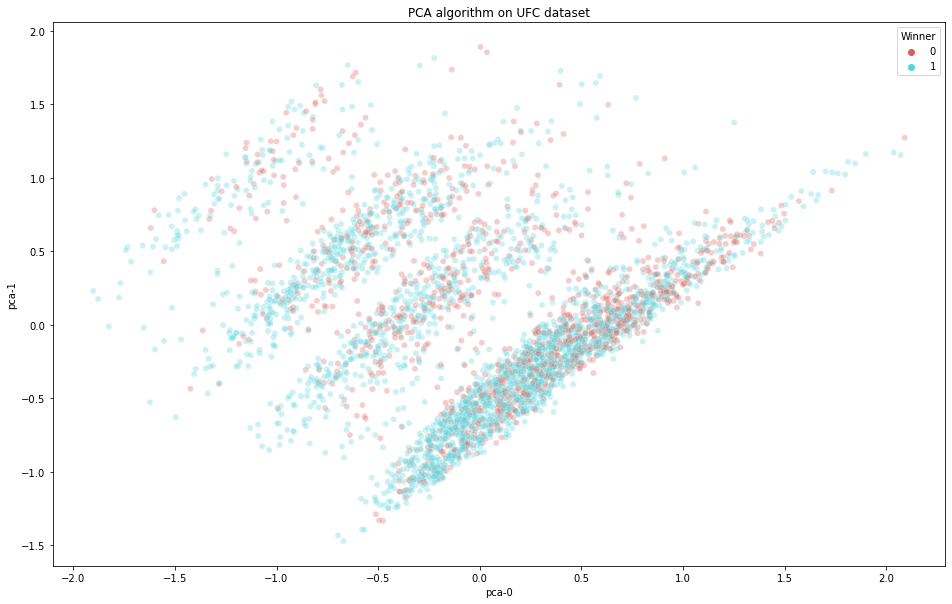

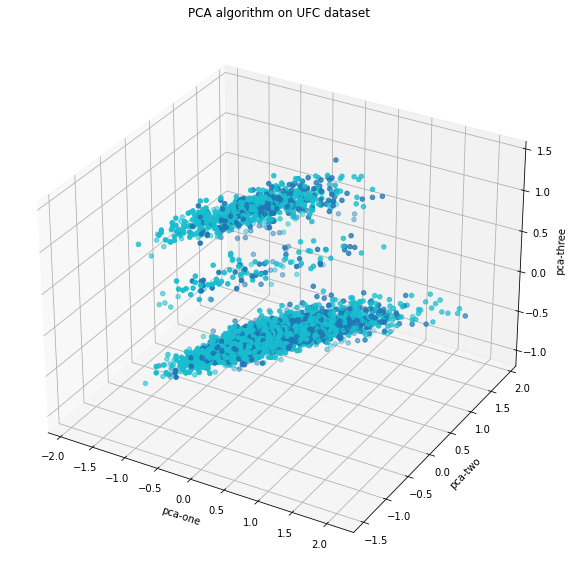

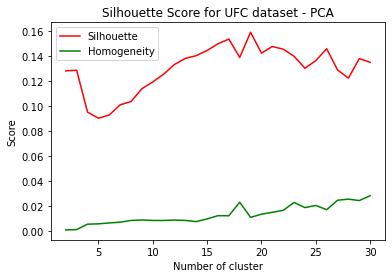

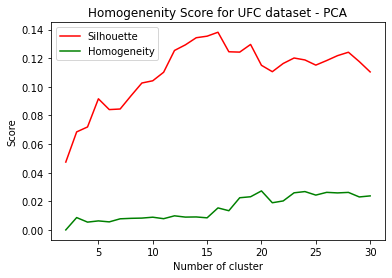

1 :  0.2810629759492434 0.21134247841222492
2 :  0.4388778474318712 0.20532069561701266
3 :  0.5237916439562176 0.20208061796030918
4 :  0.5893393096593719 0.19957949875722386
5 :  0.6524692768118733 0.19717063230192855
6 :  0.7137633552290233 0.19483181832709123
7 :  0.7653609079931534 0.19286299718500796
8 :  0.8138960144601771 0.19101103059693478
9 :  0.8587383680095759 0.18929996933532042
10 :  0.9006281027242309 0.18770157191287906
11 :  0.9395327574529344 0.18621707695813866
12 :  0.971912228914475 0.18498156510597064
13 :  1.0 0.18390981277306923


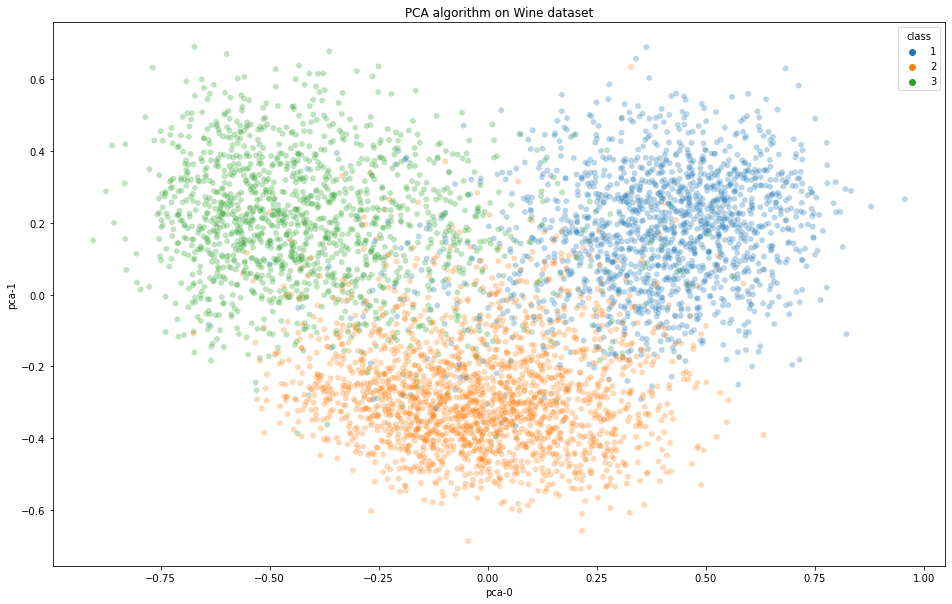

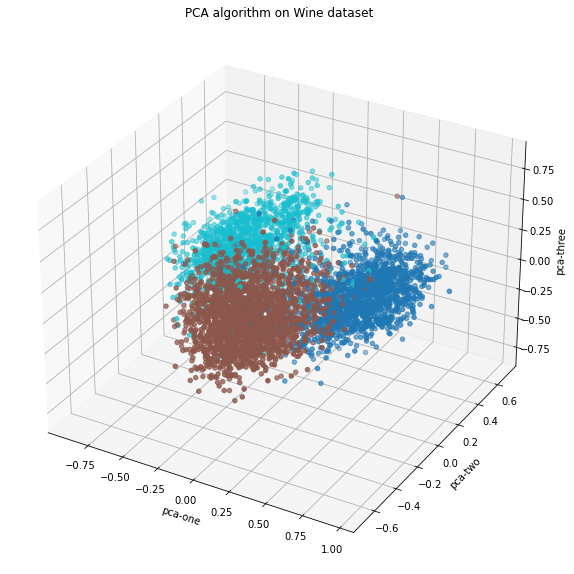

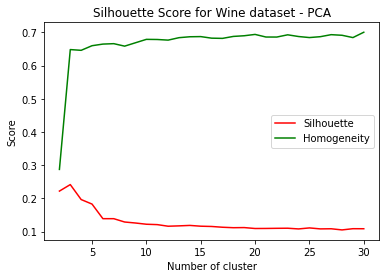

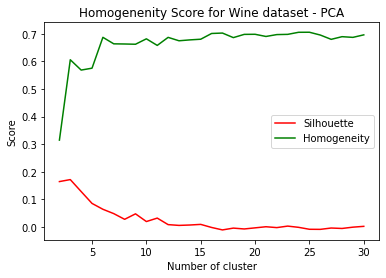

0.9334
              precision    recall  f1-score   support

           1       0.94      0.93      0.93      1577
           2       0.93      0.94      0.93      2013
           3       0.93      0.94      0.93      1410

    accuracy                           0.93      5000
   macro avg       0.93      0.93      0.93      5000
weighted avg       0.93      0.93      0.93      5000

[0.91599998 0.90997901 0.92011714 0.92801859 0.93602396 0.93206277
 0.94198502 0.91799248 0.92428519 0.932082  ] 0.9258546151627094


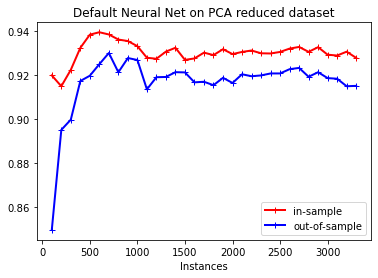

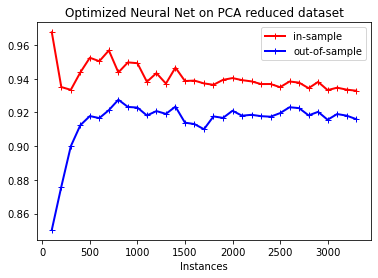

MLPClassifier(alpha=0.01, hidden_layer_sizes=(60, 60),
              learning_rate='invscaling') 0.9190874289261254
MLPClassifier(alpha=0.01, hidden_layer_sizes=(60, 60),
              learning_rate='invscaling') 0.9190874289261254


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    8.8s finished


[0.91962545 0.92381779 0.92843718 0.93127484 0.93045492] [0.91431498 0.91760731 0.91817806 0.91642477 0.91704809]


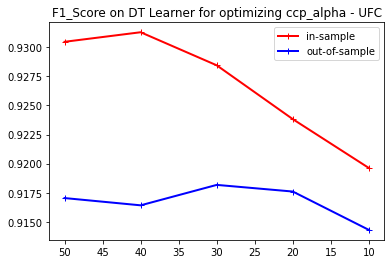

EM


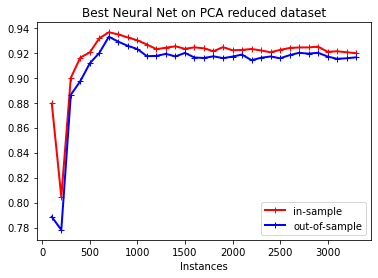

PCA Time:  86.16757153195795
              precision    recall  f1-score   support

           1    0.93372   0.91939   0.92650       521
           2    0.93182   0.92620   0.92900       664
           3    0.90776   0.93118   0.91932       465

    accuracy                        0.92545      1650
   macro avg    0.92443   0.92559   0.92494      1650
weighted avg    0.92564   0.92545   0.92548      1650

[[479  23  19]
 [ 24 615  25]
 [ 10  22 433]]


In [14]:
def separate_data_label(dataset, label):
    X = dataset.drop(label, 1).copy().values
    Y = dataset[label].copy().values
    x_df = dataset.drop(label,1)
    
    return X, Y, x_df
    
def normalize(X, x_df):
    normalize_factor = preprocessing.MinMaxScaler()
    X = normalize_factor.fit_transform(X)
    x_df = pd.DataFrame(X, columns=x_df.columns)
    
    return X, x_df

def run_gridsearch(values, adaBoost, input_train_set, output_train_set, cross_validation_splitter, weighting):
    optimalHyperparameters = GridSearchCV(adaBoost, values, cv=cross_validation_splitter, scoring=weighting)
    optimalHyperparameters.fit(input_train_set, output_train_set)
    print(optimalHyperparameters.best_estimator_, optimalHyperparameters.best_score_)
    
    return optimalHyperparameters

def run_validation_curve(learner, input_train_set, output_train_set, hyperparameter_values, hyperparameter_values2, weighting, hyperparameter, inverse_x, cross_validation_splitter, title):
    result_train, result_test = validation_curve(
        learner, input_train_set, output_train_set, param_name=hyperparameter, param_range=hyperparameter_values,
        scoring=weighting, verbose=1, cv=cross_validation_splitter, n_jobs=-1
    )
    print(result_train.mean(axis=1), result_test.mean(axis=1))
    graph_C(result_train.mean(axis=1), result_test.mean(axis=1), hyperparameter_values2, title=title, inverse_x=inverse_x)
    
    return result_train, result_test

def compute_score(input_train_set, output_train_set, AdaBoost_Learner, mean, title):
    result = evaluate_data(input_train_set, output_train_set, AdaBoost_Learner, f1_score, average=mean)
    graph_LC(result[0], result[1], result[2], title=title)
    

def findOptimalNumFeatures(totalFeatures, x_df):
    for numFeatures in totalFeatures:
        cReducedAlgorithm = PCA(n_components=numFeatures, random_state=44)
        cReducedAlgorithm.fit_transform(x_df.values)

        NewLabels = cReducedAlgorithm.fit_transform(x_df.values)
        cMatrixInverse = np.linalg.pinv(cReducedAlgorithm.components_.T)
        newSpace = np.dot(NewLabels, cMatrixInverse)
        errorOfRecontruction = mean_squared_error(x_df.values, newSpace)    

        print(numFeatures, ": ", sum(cReducedAlgorithm.explained_variance_ratio_), errorOfRecontruction)
        
def PCA_execution(x_df, comp, dataset):
    cReducedAlgorithm = PCA(n_components=comp, random_state=44)
    optimalPCA = cReducedAlgorithm.fit_transform(x_df.values)
    for i in range(comp):
        df_key = "pca-"+str(i)
        x_df[df_key] = optimalPCA[:,i]
        dataset[df_key] = optimalPCA[:,i]
    
    return optimalPCA
    
    
def plot_PCA(dataset, color_palette, num_colors, target, title):
    
    randomIndex = np.random.permutation(dataset.shape[0])
    
    plt.figure(figsize=(16,10))
    plt.title(title)
    sns.scatterplot(x="pca-0", y="pca-1",hue=target,palette=sns.color_palette(color_palette, num_colors),data=dataset,legend="full",alpha=0.3)
    plt.savefig(title)
    plt.show()
    
    ax = plt.figure(figsize=(16,10)).gca(projection='3d')
    plt.title(title)
    ax.scatter(xs=dataset.loc[randomIndex,:]["pca-0"], ys=dataset.loc[randomIndex,:]["pca-1"], zs=dataset.loc[randomIndex,:]["pca-2"], c=dataset.loc[randomIndex,:][target],  cmap='tab10')
    ax.set_xlabel('pca-one')
    ax.set_ylabel('pca-two')
    ax.set_zlabel('pca-three')
    title = title + " 3d"
    plt.savefig(title)
    plt.show()

def plot_metric(dictSilohuetteScore, dictHomogeneityScore, yLabel, title):
    plt.figure()
    plt.title(title)
    plt.plot(list(dictSilohuetteScore.keys()), list(dictSilohuetteScore.values()), 'r', label="Silhouette")
    plt.plot(list(dictHomogeneityScore.keys()), list(dictHomogeneityScore.values()), 'g', label="Homogeneity")
    plt.legend()
    plt.xlabel("Number of cluster")
    plt.ylabel(yLabel)
    plt.savefig(title)
    plt.show()
    
def silh_homog_scores(numOfClusters, X, Y, isWine, title):
    dictSilohuetteScore = {}
    dictHomogeneityScore = {}
    for i in numOfClusters:
        cKMeansAlgorithm = KMeans(n_clusters=i, n_init=50, max_iter=1000, random_state=42).fit(X)
        if isWine:
            dictHomogeneityScore[i] = homogeneity_score(Y, (cKMeansAlgorithm.labels_+1))
        else:
            dictHomogeneityScore[i] = homogeneity_score(Y, cKMeansAlgorithm.labels_)
        dictSilohuetteScore[i] = silhouette_score(X, cKMeansAlgorithm.labels_, metric='euclidean')
        
    plot_metric(dictSilohuetteScore, dictHomogeneityScore, "Score", title)
    
def expectation_maximization(numOfClusters, X, Y, title):
    dictSilohuetteScore = {}
    dictHomogeneityScore = {}
    GaussianMixScore = {}
    for i in numOfClusters:
        cExpectationMaximization = GaussianMixture(n_components=i, max_iter=100, random_state=42).fit(X)
        target = cExpectationMaximization.predict(X)
        dictSilohuetteScore[i] = silhouette_score(X, target, metric='euclidean')
        dictHomogeneityScore[i] = homogeneity_score(Y, target)
        GaussianMixScore[i] = cExpectationMaximization.score(X)

    
    plot_metric(dictSilohuetteScore, dictHomogeneityScore, "Score", title)
    

if __name__ == "__main__":
    #Initialization
    wine_label = "class"
    ufc_label = "Winner"
    mean="weighted"
    cross_validation_splitter = 10
    weighting = 'f1_weighted'
    hyperparameter = "hidden_layer_sizes"
    np.random.seed(42)
    
    
    wine_dataset = pd.read_csv("wine_dataset.csv")
    ufc_dataset = pd.read_csv("ufc_data.csv")
    
    #Data preparation
    
    ufc_dataset = preprocess_ufc_data(ufc_dataset)
    
    wine_X, wine_Y, wine_x_df = separate_data_label(wine_dataset, wine_label)
    ufc_X, ufc_Y, ufc_x_df = separate_data_label(ufc_dataset, ufc_label)
    
    #Normalization
    
    wine_X, wine_x_df = normalize(wine_X, wine_x_df)
    ufc_X, ufc_x_df = normalize(ufc_X, ufc_x_df)
    
    
    
    #UFC

    totalFeatures = list(range(2,150,1))
    
    findOptimalNumFeatures(totalFeatures, ufc_x_df)
    newLabelsUFC = PCA_execution(ufc_x_df, 72, ufc_dataset)
    plot_PCA(ufc_dataset, "hls", 2, ufc_label, "PCA algorithm on UFC dataset")
    
    #Silhuette and homogenity scores
    
    silh_homog_scores(range(2, 31, 1), newLabelsUFC, ufc_Y, False, "Silhouette Score for UFC dataset - PCA")
    
    
    #Expectation Maximization
    
    expectation_maximization(range(2, 31, 1), ufc_X, ufc_Y, "Homogenenity Score for UFC dataset - PCA")
    
    
    #Wine
    
    totalFeatures = list(range(1,14,1))
    
    findOptimalNumFeatures(totalFeatures, wine_x_df)
    newLabelsWine = PCA_execution(wine_x_df, 8, wine_dataset)
    plot_PCA(wine_dataset, "tab10", 3, wine_label, "PCA algorithm on Wine dataset")
    
    #Silhuette and homogenity scores
    
    silh_homog_scores(range(2, 31, 1), newLabelsWine, wine_Y, True, "Silhouette Score for Wine dataset - PCA")
    
    
    #Expectation Maximization
    
    expectation_maximization(range(2, 31, 1), wine_X, wine_Y, "Homogenenity Score for Wine dataset - PCA")
    
    
    
    
    
    #Neural Net

    NN_Learner = MLPClassifier()
    NN_Learner.fit(newLabelsWine, wine_Y)

    train_y_hat_wine = NN_Learner.predict(newLabelsWine)
    errorMetric = accuracy_score(wine_Y, train_y_hat_wine)
    print(errorMetric)
    print(classification_report(wine_Y, train_y_hat_wine))

    result = cross_val_score(NN_Learner, newLabelsWine, wine_Y, scoring=weighting, cv=cross_validation_splitter)
    print(result, result.mean())

    input_train_set, input_test_set, output_train_set, output_test_set = train_test_split(newLabelsWine, wine_Y, test_size=0.33, random_state=42, stratify=wine_Y)

    compute_score(input_train_set, output_train_set, NN_Learner, mean, "Default Neural Net on PCA reduced dataset")

    #Best net 

    optimized_NN = MLPClassifier(alpha=0.1, hidden_layer_sizes=(60, 60), learning_rate='invscaling')

    compute_score(input_train_set, output_train_set, optimized_NN, mean, "Optimized Neural Net on PCA reduced dataset")


    values = {
        'hidden_layer_sizes': [(30,30), (60,60), (90, 90)],
        "alpha" : [0.1, 0.01],
        'learning_rate': ['invscaling'],
    }
    
    optimalHyperparameters = run_gridsearch(values, MLPClassifier(), input_train_set, output_train_set, cross_validation_splitter, weighting)

    print(optimalHyperparameters.best_estimator_, optimalHyperparameters.best_score_)
    
    
    hyperparameter_values2 = [10,20,30,40,50]
    hyperparameter_values = [(10,10), (20,20), (30,30), (40,40), (50,50)]
    
    result_train, result_test = run_validation_curve(optimized_NN, input_train_set, output_train_set, hyperparameter_values, hyperparameter_values2, weighting, hyperparameter, True, 5, "F1_Score on DT Learner for optimizing ccp_alpha - UFC")

    print('EM')
    start = timeit.default_timer()
    
    optimized_NN = MLPClassifier(alpha=0.1, hidden_layer_sizes=(10, 10), learning_rate='invscaling')

    compute_score(input_train_set, output_train_set, optimized_NN, mean, "Best Neural Net on PCA reduced dataset")

    stop = timeit.default_timer()
    print('PCA Time: ', stop - start) 
    
    optimized_NN.fit(input_train_set, output_train_set)
    test_y_hat = optimized_NN.predict(input_test_set)
    print(classification_report(output_test_set, test_y_hat, digits=5))
    print(confusion_matrix(output_test_set, test_y_hat))
    
    